In [ ]:
#Fred Kalash
#HW3-1
#Applied Machine Learning

In [1]:
#Problem 1

In [3]:
#a
#b

(540, 2500) (540,)
(540, 2500) (540,)


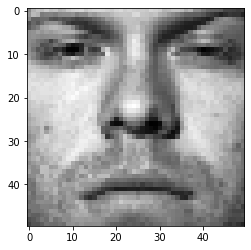

In [6]:
import numpy as np
import pandas as pd
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
import matplotlib.pyplot as pp
%matplotlib inline

train_labels = []
train_data = []
for line in open('train.txt'):
    im = pp.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print(train_data.shape, train_labels.shape)
print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(100, 2500) (100,)
(100, 2500) (100,)


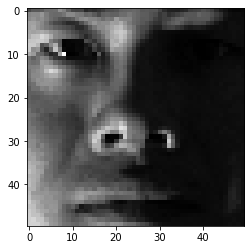

In [7]:
test_labels = []
test_data = []
for line in open('test.txt'):
    im = pp.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print(test_data.shape, test_labels.shape)
print(test_data.shape, test_labels.shape)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [8]:
#c

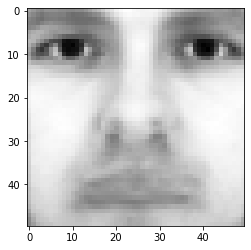

In [9]:
x_mean = pd.DataFrame(train_data).mean(axis=0)
plt.imshow(x_mean.values.reshape(50,50), cmap = cm.Greys_r)
plt.show()

x_mean = x_mean.values

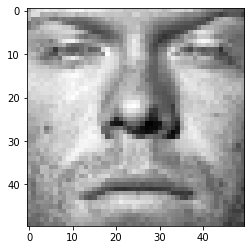

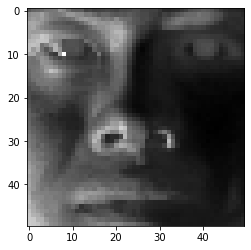

In [10]:
train_data = train_data-x_mean
test_data = test_data-x_mean
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [11]:
u, s, vh = np.linalg.svd(train_data, full_matrices=True)
print(u.shape)
print(s.shape)
print(vh.shape)

(540, 540)
(540,)
(2500, 2500)


In [12]:
#e

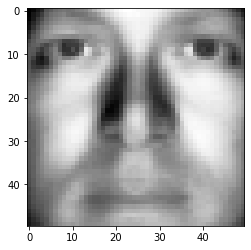

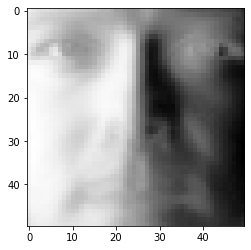

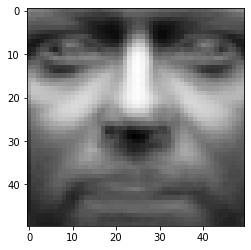

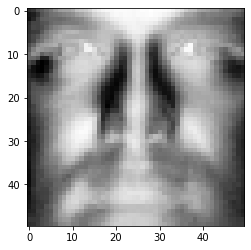

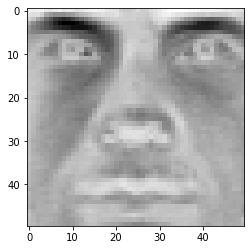

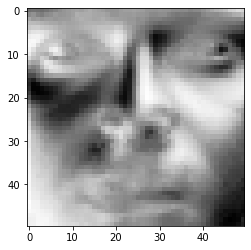

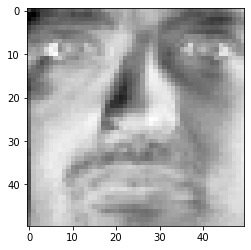

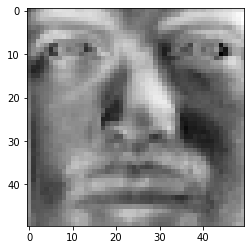

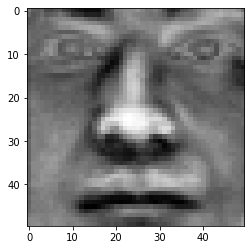

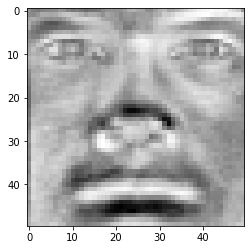

In [13]:
for j in range(10):
    plt.imshow(vh[j, :].reshape(50,50), cmap = cm.Greys_r)
    plt.show()

In [14]:
#f

In [15]:
rank_list = []
for r in range(1,201):
    xr = u[:,0:r]@np.diag(s[0:r])@vh[0:r,:]
    diff = train_data - xr
    error = np.linalg.norm(diff, ord='fro')
    rank_list.append(error)

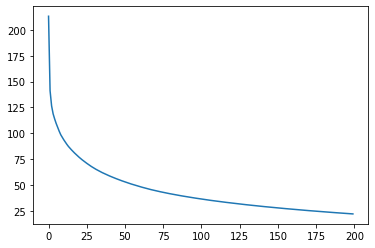

In [16]:
# x-axis is r value
# y-axis is rank-r approximation error
pd.Series(rank_list).plot()

In [17]:
#g

In [18]:
U, S, V = np.linalg.svd(train_data, full_matrices=True)

def get_features(x, r):
    return x@np.transpose(V[0:r])

r_val = 2
tmp = get_features(train_data, r_val)
print(tmp.shape)

assert tmp.shape[0] == train_data.shape[0]

assert tmp.shape[1] == r_val

(540, 2)


In [19]:
tmp = get_features(test_data, r_val)
print(tmp.shape)

(100, 2)


In [20]:
#h

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver = 'saga', multi_class = 'ovr', max_iter=1000)
y_train = pd.read_csv('train.txt', header=None, sep = ' ')
y_train = y_train[1].values

y_test = pd.read_csv('test.txt', header=None, sep = ' ')
y_test = y_test[1].values

In [23]:
X_train = get_features(train_data, 10)
lr.fit(X_train, y_train)
X_test = get_features(test_data, 10)
preds = lr.predict(X_test)

print((preds == y_test).sum()/len(preds))

0.83


In [24]:
# Report the classification accuracy on the test set.
# test_acc_r10:  0.81  

In [29]:
accuracy_list = []
for r in range(1,201):
    lr = LogisticRegression(random_state=0, solver = 'saga', multi_class = 'ovr', max_iter=1000)
    X_train = get_features(train_data, r)
    lr.fit(X_train, y_train)
    X_test = get_features(test_data, r)
    preds = lr.predict(X_test)
    acc = (preds == y_test).sum()/len(preds)
    accuracy_list.append(acc)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter 

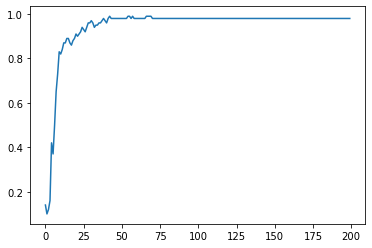

In [30]:
pd.Series(accuracy_list).plot()

In [31]:
accuracy_list

[0.14,
 0.1,
 0.12,
 0.16,
 0.42,
 0.37,
 0.5,
 0.65,
 0.73,
 0.83,
 0.82,
 0.84,
 0.87,
 0.87,
 0.89,
 0.89,
 0.87,
 0.86,
 0.88,
 0.89,
 0.91,
 0.9,
 0.91,
 0.92,
 0.94,
 0.93,
 0.92,
 0.94,
 0.96,
 0.96,
 0.97,
 0.96,
 0.94,
 0.95,
 0.95,
 0.96,
 0.96,
 0.97,
 0.98,
 0.97,
 0.96,
 0.98,
 0.99,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.99,
 0.99,
 0.98,
 0.99,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.99,
 0.99,
 0.99,
 0.99,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0